In [39]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from Bio import Entrez, SeqIO
import gzip
import requests
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd


%reload_ext autoreload
%autoreload 2
import dinucleo_freq as dnf

In [ ]:
with open("observed.json", "r") as f:
    observed = json.load(f)
with open("theo.json", "r") as f:
    theo = json.load(f)
with open("organisms.json", "r") as f:
    organisms = json.load(f)

In [ ]:
dist_obs = pd.DataFrame(observed)
dist_obs = dist_obs.rename(index=organisms)
dist_obs.to_csv("dist_obs.tsv", sep="\t")


dist_th = pd.DataFrame(theo)
dist_th = dist_th.rename(index=organisms)
dist_th.to_csv("dist_th.tsv", sep="\t")

IndexError: list index out of range

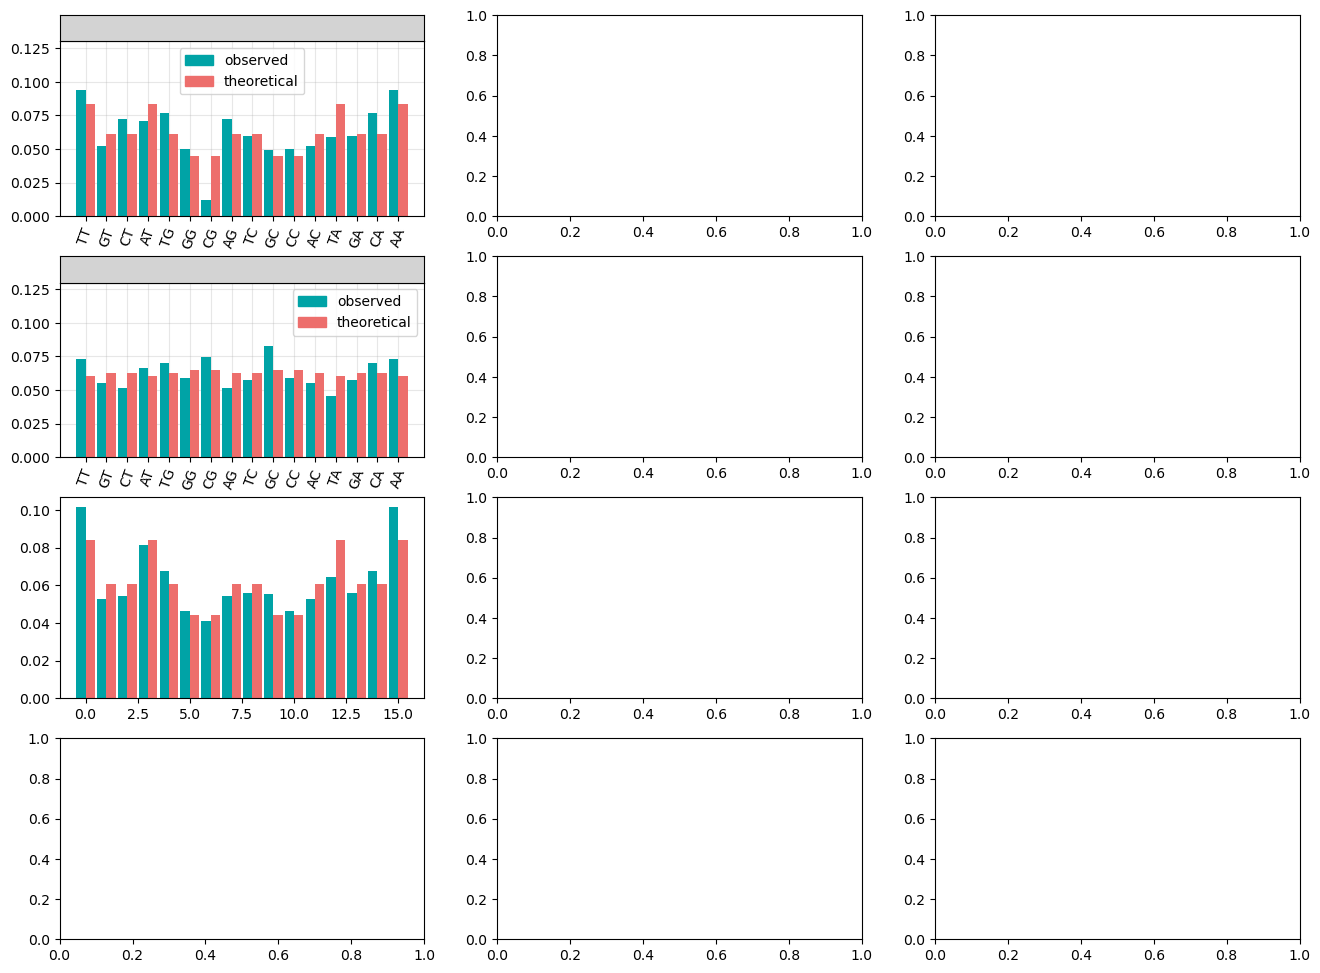

In [175]:
fig, axs = plt.subplots(4, 3, figsize=(16, 12))

j=0
for i in range(len(observed)):
    
    k = i%4
    
    dinucleotides = []
    frequencies_obs = []
    frequencies_theo = []
    for key in observed[i]:
        dinucleotides.append(str(key))
        frequencies_obs.append(observed[i][key])
        frequencies_theo.append(theo[i][key])    

    bar_width = 0.45
    x_pos = np.arange(len(dinucleotides)) 

    axs[k,j].bar(x_pos - bar_width/2, frequencies_obs, width=bar_width, color='#00A3A6', zorder=2)
    axs[k,j].bar(x_pos + bar_width/2, frequencies_theo, width=bar_width, color='#ED6E6C',  zorder=2)

    #axs[k,j].set_xlabel('Dinucleotide')
    #axs[k,j].set_ylabel('Frequency')
    axs[k,j].set_title(f'{organisms[i]}')
    axs[k,j].set_xticks(x_pos)
    axs[k,j].set_xticklabels(dinucleotides, rotation=70)
    axs[k,j].set_ylim(0, 0.13)


    obs_patch = mpatches.Patch(color='#00A3A6', label='observed')
    theo_patch = mpatches.Patch(color='#ED6E6C', label='theoretical')
    axs[k,j].legend(handles=[obs_patch, theo_patch])

    axs[k,j].grid(zorder=0, alpha=0.3)
    
    
    divider = make_axes_locatable(axs[k,j])
    cax = divider.append_axes("top", size="15%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('lightgrey')

    at = AnchoredText(f"{organisms[k]} {j+1}", loc=10,
                          prop=dict(backgroundcolor='lightgrey',
                                    size=8, color='black'), frameon=False)
    
    if k == 3:
        j+=1

plt.title(f"Dinucleotide frequency in model organisms' genomes\n")
plt.show()

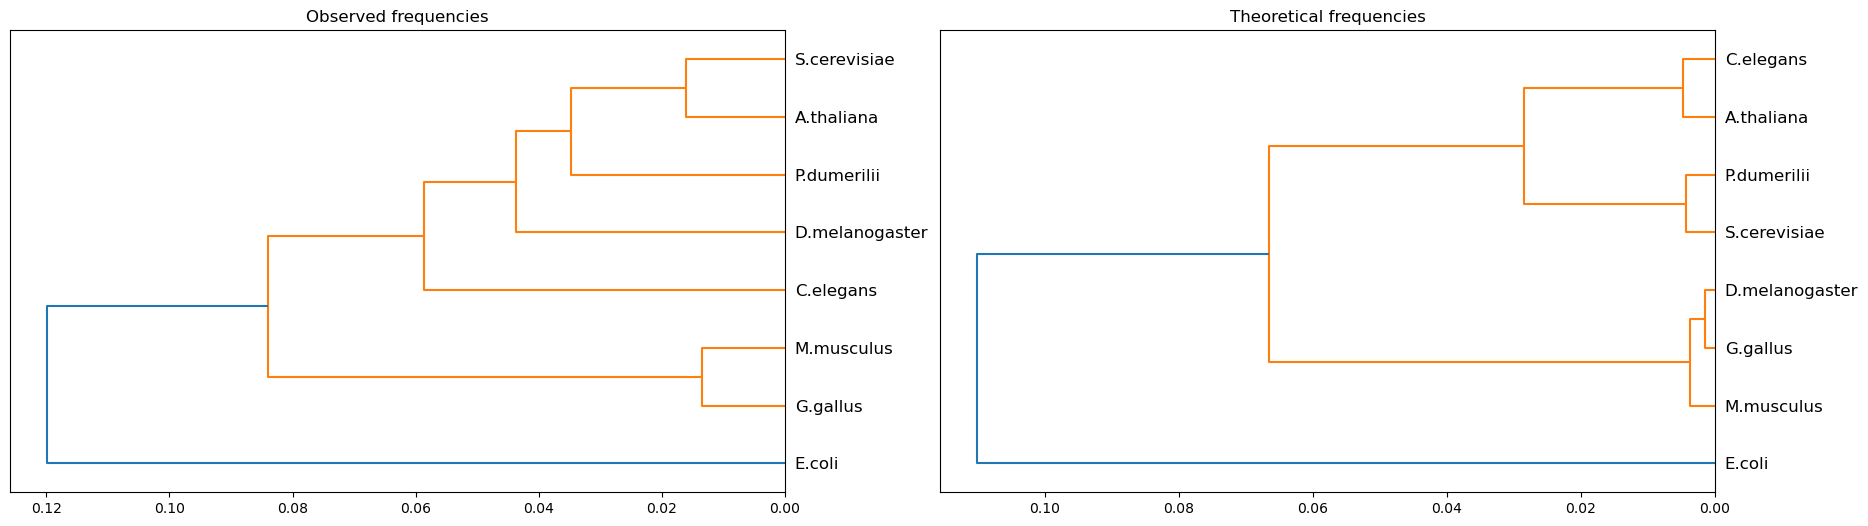

In [131]:
from scipy.cluster.hierarchy import linkage, dendrogram

fig = plt.figure(figsize=(22, 6))

linkage_matrix1 = linkage(dist_obs, method='ward')
ax1 = fig.add_subplot(121)
dendrogram(linkage_matrix1, labels=list(dist_obs.index), orientation='left')
ax1.set_title('Observed frequencies')


linkage_matrix2 = linkage(dist_th, method='ward')
ax2 = fig.add_subplot(122)
dendrogram(linkage_matrix2, labels=list(dist_th.index), orientation='left')
ax2.set_title('Theoretical frequencies')


plt.show()


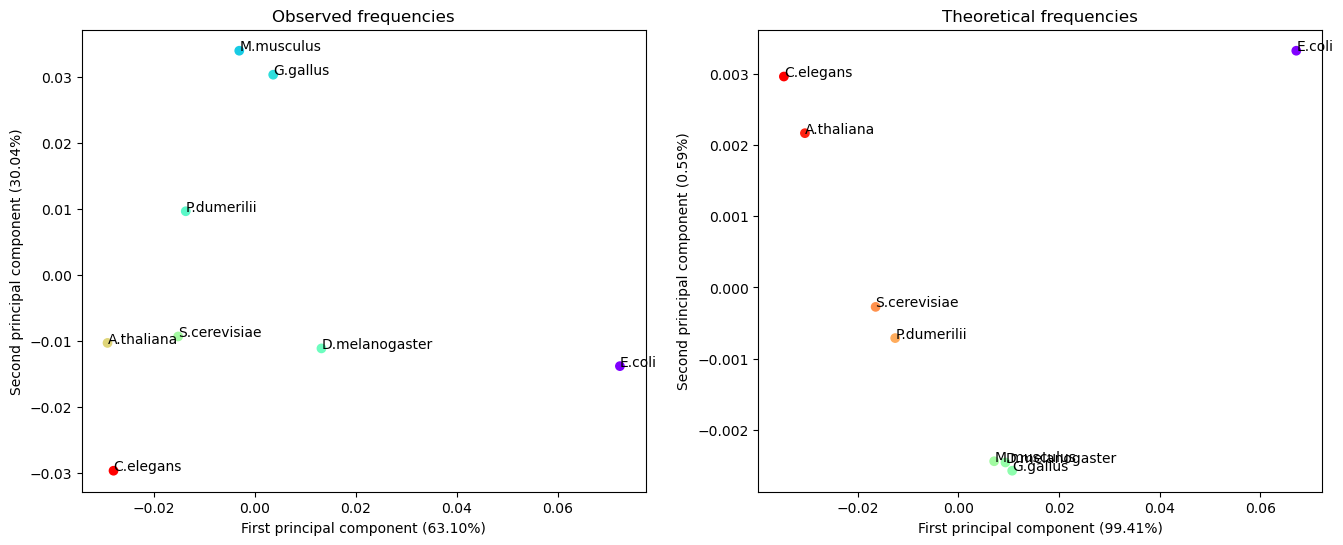

In [113]:
fig = plt.figure(figsize=(16, 6))

X = dist_obs.iloc[:, :-1].values
y = dist_obs.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

variance_ratio = pca.explained_variance_ratio_
ax1 = fig.add_subplot(121)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
ax1.set_xlabel(f'First principal component ({variance_ratio[0]*100:.2f}%)')
ax1.set_ylabel(f'Second principal component ({variance_ratio[1]*100:.2f}%)')

for i, label in enumerate(dist_obs.index):
    ax1.text(X_pca[i, 0], X_pca[i, 1], label)

ax1.set_title('Observed frequencies')


X = dist_th.iloc[:, :-1].values
y = dist_th.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

variance_ratio = pca.explained_variance_ratio_
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
ax2.set_xlabel(f'First principal component ({variance_ratio[0]*100:.2f}%)')
ax2.set_ylabel(f'Second principal component ({variance_ratio[1]*100:.2f}%)')

for i, label in enumerate(dist_th.index):
    ax2.text(X_pca[i, 0], X_pca[i, 1], label)
ax2.set_title('Theoretical frequencies')

plt.show()

